In [1]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
(x_data,y_data),(t_x_data,t_y_data) = load_data() #데이터 로드

In [2]:
x_data.shape

(60000, 28, 28)

In [9]:
from sklearn.model_selection import train_test_split
x_data=x_data.reshape(-1,28,28,1)/255.0
tt_x=t_x_data.reshape(-1,28,28,1)/255.0
t_x,tt_x,t_y,tt_y = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [10]:
from tensorflow import keras
m=keras.Sequential()
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'
                          ,input_shape=(28,28,1)))
m.add(keras.layers.MaxPooling2D(2))
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(keras.layers.MaxPooling2D(2))

In [11]:
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.4))
m.add(keras.layers.Dense(10,activation='softmax'))
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

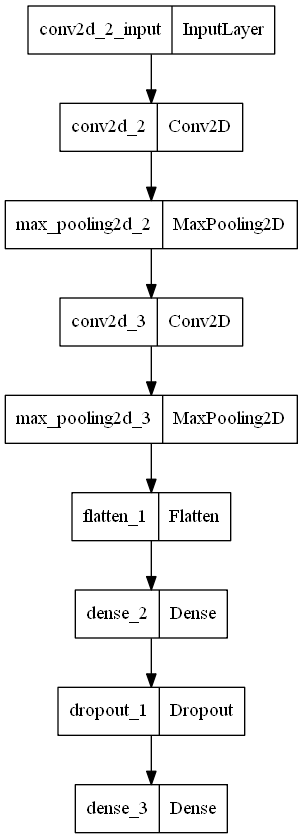

In [12]:
keras.utils.plot_model(m)

In [7]:
m= keras.models.load_model('best-cnn-model.h5')

In [8]:
#모델학습
history = m.fit(t_x,t_y,batch_size=40,validation_data=0.25, epochs=10, verbose=1)


Epoch 1/10
900/900 [==============================] - 31s 34ms/step - loss: 0.4504 - accuracy: 0.8603 - val_loss: 0.0812 - val_accuracy: 0.9767
Epoch 2/10
900/900 [==============================] - 30s 33ms/step - loss: 0.1428 - accuracy: 0.9578 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 3/10
873/900 [============================>.] - ETA: 0s - loss: 0.1052 - accuracy: 0.9690

KeyboardInterrupt: 

In [13]:
print(history)
print(history.history)

NameError: name 'history' is not defined

In [ ]:
#훈련과정 시각화(정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
end== list(np.unique(y_data))
